In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%pylab inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers

Populating the interactive namespace from numpy and matplotlib


In [0]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [81]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
train_path='drive/My Drive/ML study/train/'
test_path='drive/My Drive/ML study/test1/'
datagen = ImageDataGenerator(rotation_range=40,shear_range=0.2,width_shift_range=0.2, height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.3,rescale=1./255)
#datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20 

In [0]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(directory,target_size=(150, 150),batch_size=batch_size,class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

In [84]:
train_features, train_labels = extract_features(train_path,2000 )

Found 25007 images belonging to 2 classes.


In [85]:
validation_features, validation_labels = extract_features(train_path, 1000)

Found 25007 images belonging to 2 classes.


In [86]:
test_features, test_labels = extract_features(train_path, 500)

Found 25007 images belonging to 2 classes.


In [0]:
train_features = train_features.reshape(2000, 4 * 4 * 512)
validation_features = validation_features.reshape(1000, 4 * 4 * 512)

In [0]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(4 * 4 * 512,)))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.1502 - acc: 0.9570 - val_loss: 0.3831 - val_acc: 0.8200
Epoch 2/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.1496 - acc: 0.9510 - val_loss: 0.3846 - val_acc: 0.8150
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.1450 - acc: 0.9610 - val_loss: 0.3855 - val_acc: 0.8170
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.1344 - acc: 0.9630 - val_loss: 0.3900 - val_acc: 0.8190
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.1321 - acc: 0.9625 - val_loss: 0.3856 - val_acc: 0.8170
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.1293 - acc: 0.9685 - val_loss: 0.3941 - val_acc: 0.8190
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.1285 - acc: 0.9600 - val_loss: 0.3889 - val_acc: 0.8190


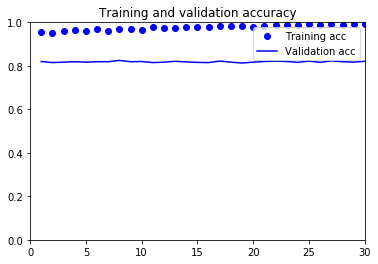

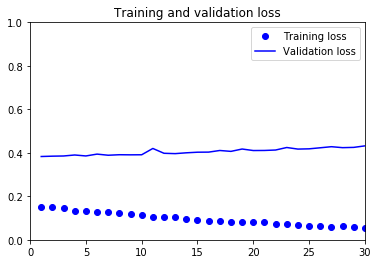

In [100]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.axis([0, 30, 0, 1])
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.axis([0, 30, 0, 1])
plt.title('Training and validation loss')
plt.legend()
plt.show()